In [14]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten,Dense,Dropout,MaxPool2D,Conv2D

In [15]:
df_train = pd.read_csv('../SLD/sign_mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [16]:
df_train['label'].unique

<bound method Series.unique of 0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64>

In [17]:
df_test=pd.read_csv('../SLD/sign_mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [18]:
print(df_train.shape)
print(df_test.shape)

(27455, 785)
(7172, 785)


In [19]:
train_label = df_train['label']
test_label = df_test['label']

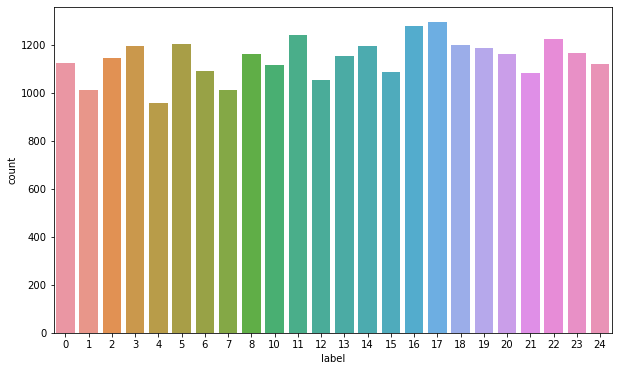

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x= train_label,data=df_train)
plt.show()

In [21]:
df_train.drop("label",axis=1,inplace=True)
df_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


In [22]:
df_test.drop("label",axis=1,inplace=True)
df_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,135,119,108,102,105,99,61,103,121,133,...,108,112,116,114,118,180,184,176,167,163
7168,157,159,161,164,166,166,171,174,175,176,...,213,213,213,214,213,211,210,210,209,208
7169,190,191,190,191,190,190,192,192,191,192,...,216,215,213,214,214,213,210,211,209,208
7170,201,205,208,209,214,216,218,223,226,229,...,112,169,255,255,237,113,91,67,70,63


In [23]:
x_train = df_train.values.reshape(-1,28,28,1)
x_test = df_test.values.reshape(-1,28,28,1)

In [24]:
lb = LabelBinarizer()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)


In [24]:
y_test[:4]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])

In [25]:
x_train = x_train/255
x_test = x_test/255

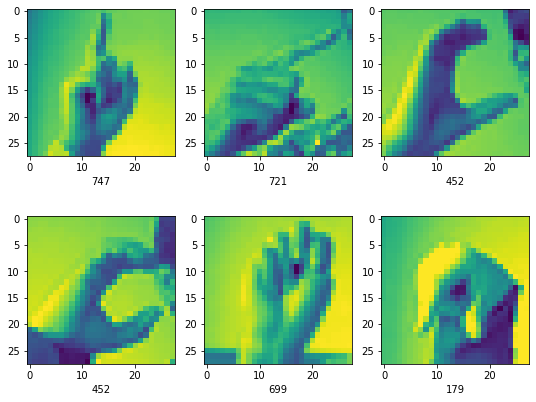

In [26]:
plt.figure(figsize=(9,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i])
    plt.xlabel(np.argmax(x_train[i]))
    
plt.show()

In [27]:
train_datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,zoom_range=0.2)
train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train,y_train,batch_size= 128)

In [36]:
from tensorflow.keras import Sequential
model=Sequential()
model.add(Conv2D(128,(3,3),input_shape=(28,28,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

#model.add(Conv2D(32,(3,3),activation='relu'))
#model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(units=512 , activation='relu'))
model.add(Dense(units=24 , activation='softmax'))


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_3 (Dense)              (None, 24)               

In [37]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [16]:


history=model.fit(train_generator,validation_data=(x_test,y_test),epochs=25,batch_size=128)

Epoch 1/25
215/215 [==============================] - 56s 262ms/step - loss: 2.4763 - accuracy: 0.2571 - val_loss: 1.2950 - val_accuracy: 0.5927
Epoch 2/25
215/215 [==============================] - 52s 243ms/step - loss: 1.4248 - accuracy: 0.5500 - val_loss: 0.7356 - val_accuracy: 0.7472
Epoch 3/25
215/215 [==============================] - 54s 253ms/step - loss: 0.9998 - accuracy: 0.6763 - val_loss: 0.5246 - val_accuracy: 0.7978
Epoch 4/25
215/215 [==============================] - 52s 242ms/step - loss: 0.7239 - accuracy: 0.7615 - val_loss: 0.3238 - val_accuracy: 0.8986
Epoch 5/25
215/215 [==============================] - 48s 223ms/step - loss: 0.5564 - accuracy: 0.8175 - val_loss: 0.2097 - val_accuracy: 0.9377
Epoch 6/25
215/215 [==============================] - 48s 223ms/step - loss: 0.4580 - accuracy: 0.8509 - val_loss: 0.1443 - val_accuracy: 0.9594
Epoch 7/25
215/215 [==============================] - 50s 234ms/step - loss: 0.3725 - accuracy: 0.8807 - val_loss: 0.1626 - val_ac

In [17]:
y_pred = np.argmax(model.predict(x_test),axis =1)
y_pred

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

In [18]:
y_true = np.argmax(y_test, axis =1)
y_true

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_pred)

0.9955382041271612

In [20]:
model.evaluate(x_test,y_test)

225/225 [==============================] - 4s 19ms/step - loss: 0.0227 - accuracy: 0.9955


[0.022711118683218956, 0.9955381751060486]

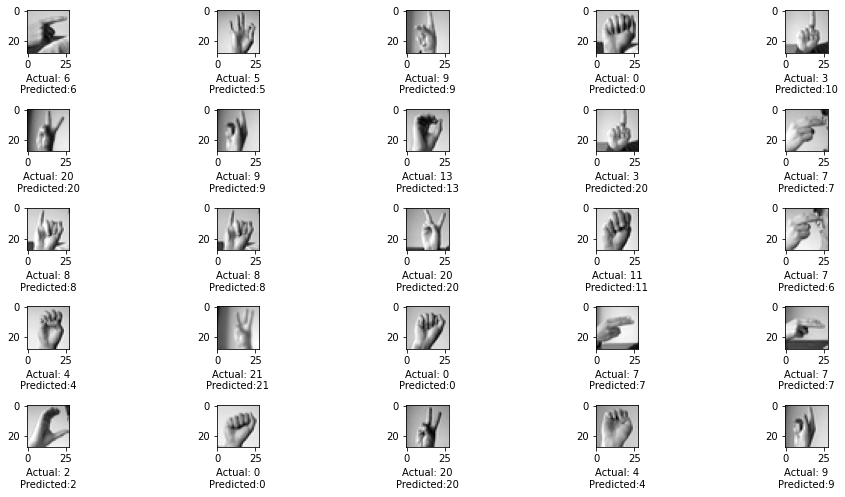

In [110]:
plt.figure(figsize=(14,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i],cmap='gray')
    plt.xlabel(f"Actual: {y_true[i]}\nPredicted:{y_pred[i]}")
plt.tight_layout()
plt.show()

In [26]:
from keras.preprocessing import image
test_image =  image.load_img('D:\AI ML DL\SLD\images.gif',target_size=(28,28,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict_classes(test_image)
result

array([12], dtype=int64)

In [21]:
fname ="trained_model.hdf5"
model.save(fname,overwrite=True)

In [34]:
fname = "trained_model.hdf5"
model.load_weights(fname)

In [41]:
from keras.preprocessing import image
test_image =  image.load_img('D:\AI ML DL\SLD\download.jpg',target_size=(28,28,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict_classes(test_image)
result

array([5], dtype=int64)